In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
import numpy as np
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)]
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=100, tol=-np.infty, random_state=42)
per_clf.fit(X,y)
y_pred = per_clf.predict([[2,0.5]])

In [4]:
import numpy as np
import tensorflow as tf

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [5]:
feature_cols = [tf.feature_column.numeric_column("X", shape=[28*28])]
dnn_clf = tf.estimator.DNNClassifier(hidden_units=[300,100], n_classes=10,
                                    feature_columns=feature_cols)
input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X":X_train}, y=y_train, num_epochs=40, batch_size=50, shuffle=True)
dnn_clf.train(input_fn=input_fn)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/r4/ld0lj9qx2r9dbdjl8zmcyzqm0000gn/T/tmpv10c8zg7', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': None, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x149e7e710>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 1 into /var/folders/r4/

INFO:tensorflow:global_step/sec: 533.131
INFO:tensorflow:loss = 0.38865897, step = 7201 (0.188 sec)
INFO:tensorflow:global_step/sec: 613.046
INFO:tensorflow:loss = 3.2670758, step = 7301 (0.163 sec)
INFO:tensorflow:global_step/sec: 608.028
INFO:tensorflow:loss = 0.68508476, step = 7401 (0.165 sec)
INFO:tensorflow:global_step/sec: 609.07
INFO:tensorflow:loss = 1.001829, step = 7501 (0.164 sec)
INFO:tensorflow:global_step/sec: 604.766
INFO:tensorflow:loss = 0.5344564, step = 7601 (0.165 sec)
INFO:tensorflow:global_step/sec: 602.351
INFO:tensorflow:loss = 0.27845195, step = 7701 (0.166 sec)
INFO:tensorflow:global_step/sec: 603.662
INFO:tensorflow:loss = 1.4816705, step = 7801 (0.166 sec)
INFO:tensorflow:global_step/sec: 606.67
INFO:tensorflow:loss = 0.84824955, step = 7901 (0.165 sec)
INFO:tensorflow:global_step/sec: 617.872
INFO:tensorflow:loss = 0.41792768, step = 8001 (0.162 sec)
INFO:tensorflow:global_step/sec: 612.91
INFO:tensorflow:loss = 6.938818, step = 8101 (0.163 sec)
INFO:tenso

INFO:tensorflow:global_step/sec: 597.493
INFO:tensorflow:loss = 0.021493156, step = 15401 (0.167 sec)
INFO:tensorflow:global_step/sec: 613.633
INFO:tensorflow:loss = 0.06850815, step = 15501 (0.163 sec)
INFO:tensorflow:global_step/sec: 612.813
INFO:tensorflow:loss = 0.015922692, step = 15601 (0.163 sec)
INFO:tensorflow:global_step/sec: 611.901
INFO:tensorflow:loss = 0.122007824, step = 15701 (0.163 sec)
INFO:tensorflow:global_step/sec: 599.841
INFO:tensorflow:loss = 0.1880184, step = 15801 (0.167 sec)
INFO:tensorflow:global_step/sec: 613.486
INFO:tensorflow:loss = 0.111739606, step = 15901 (0.163 sec)
INFO:tensorflow:global_step/sec: 607.548
INFO:tensorflow:loss = 0.044935964, step = 16001 (0.165 sec)
INFO:tensorflow:global_step/sec: 611.049
INFO:tensorflow:loss = 0.3434081, step = 16101 (0.164 sec)
INFO:tensorflow:global_step/sec: 615.244
INFO:tensorflow:loss = 0.20359433, step = 16201 (0.163 sec)
INFO:tensorflow:global_step/sec: 604.278
INFO:tensorflow:loss = 0.08931965, step = 16301

INFO:tensorflow:global_step/sec: 596.709
INFO:tensorflow:loss = 0.012947319, step = 23501 (0.168 sec)
INFO:tensorflow:global_step/sec: 605.621
INFO:tensorflow:loss = 0.025351752, step = 23601 (0.165 sec)
INFO:tensorflow:global_step/sec: 614.753
INFO:tensorflow:loss = 0.008851003, step = 23701 (0.163 sec)
INFO:tensorflow:global_step/sec: 620.751
INFO:tensorflow:loss = 0.046305515, step = 23801 (0.161 sec)
INFO:tensorflow:global_step/sec: 613.614
INFO:tensorflow:loss = 0.009757763, step = 23901 (0.163 sec)
INFO:tensorflow:global_step/sec: 618.682
INFO:tensorflow:loss = 0.029600317, step = 24001 (0.162 sec)
INFO:tensorflow:global_step/sec: 611.827
INFO:tensorflow:loss = 0.017131384, step = 24101 (0.163 sec)
INFO:tensorflow:global_step/sec: 612.245
INFO:tensorflow:loss = 0.025407232, step = 24201 (0.163 sec)
INFO:tensorflow:global_step/sec: 613.561
INFO:tensorflow:loss = 0.005627384, step = 24301 (0.163 sec)
INFO:tensorflow:global_step/sec: 611.725
INFO:tensorflow:loss = 0.05720427, step =

INFO:tensorflow:global_step/sec: 578.5
INFO:tensorflow:loss = 0.01105613, step = 31601 (0.173 sec)
INFO:tensorflow:global_step/sec: 617.905
INFO:tensorflow:loss = 0.02518607, step = 31701 (0.162 sec)
INFO:tensorflow:global_step/sec: 599.718
INFO:tensorflow:loss = 0.010005051, step = 31801 (0.167 sec)
INFO:tensorflow:global_step/sec: 610.207
INFO:tensorflow:loss = 0.026658129, step = 31901 (0.164 sec)
INFO:tensorflow:global_step/sec: 616.743
INFO:tensorflow:loss = 0.00589541, step = 32001 (0.162 sec)
INFO:tensorflow:global_step/sec: 614.662
INFO:tensorflow:loss = 0.021204501, step = 32101 (0.163 sec)
INFO:tensorflow:global_step/sec: 601.2
INFO:tensorflow:loss = 0.04460819, step = 32201 (0.166 sec)
INFO:tensorflow:global_step/sec: 610.903
INFO:tensorflow:loss = 0.040154107, step = 32301 (0.164 sec)
INFO:tensorflow:global_step/sec: 620.886
INFO:tensorflow:loss = 0.087951034, step = 32401 (0.161 sec)
INFO:tensorflow:global_step/sec: 607.423
INFO:tensorflow:loss = 0.01106162, step = 32501 (

INFO:tensorflow:global_step/sec: 572.535
INFO:tensorflow:loss = 0.009067169, step = 39701 (0.175 sec)
INFO:tensorflow:global_step/sec: 612.159
INFO:tensorflow:loss = 0.104562774, step = 39801 (0.163 sec)
INFO:tensorflow:global_step/sec: 607.103
INFO:tensorflow:loss = 0.010642175, step = 39901 (0.165 sec)
INFO:tensorflow:global_step/sec: 613.824
INFO:tensorflow:loss = 0.022650871, step = 40001 (0.163 sec)
INFO:tensorflow:global_step/sec: 620.075
INFO:tensorflow:loss = 0.0030301467, step = 40101 (0.161 sec)
INFO:tensorflow:global_step/sec: 612.324
INFO:tensorflow:loss = 0.015228275, step = 40201 (0.163 sec)
INFO:tensorflow:global_step/sec: 613.342
INFO:tensorflow:loss = 0.022020243, step = 40301 (0.163 sec)
INFO:tensorflow:global_step/sec: 598.373
INFO:tensorflow:loss = 0.011046123, step = 40401 (0.167 sec)
INFO:tensorflow:global_step/sec: 608.831
INFO:tensorflow:loss = 0.051628854, step = 40501 (0.164 sec)
INFO:tensorflow:global_step/sec: 607.512
INFO:tensorflow:loss = 0.0063248184, ste

In [6]:
test_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"X":X_test}, y=y_test, shuffle=False)
eval_results = dnn_clf.evaluate(input_fn=test_input_fn)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2019-02-11-07:27:12
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/r4/ld0lj9qx2r9dbdjl8zmcyzqm0000gn/T/tmpv10c8zg7/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2019-02-11-07:27:12
INFO:tensorflow:Saving dict for global step 44000: accuracy = 0.9794, average_loss = 0.106978565, global_step = 44000, loss = 13.541591


In [7]:
eval_results

{'accuracy': 0.9794,
 'average_loss': 0.106978565,
 'loss': 13.541591,
 'global_step': 44000}

In [8]:
y_pred_iter = dnn_clf.predict(input_fn=test_input_fn)
y_pred = list(y_pred_iter)
y_pred[0]

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/r4/ld0lj9qx2r9dbdjl8zmcyzqm0000gn/T/tmpv10c8zg7/model.ckpt-44000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


{'logits': array([-10.870966 ,   0.1988117,  -1.8879312,   8.530668 , -11.532813 ,
         -4.442738 , -19.00914  ,  20.522406 ,  -0.5042079,   6.5539174],
       dtype=float32),
 'probabilities': array([2.3228915e-14, 1.4913261e-09, 1.8505936e-10, 6.1951464e-06,
        1.1983750e-14, 1.4380467e-11, 6.7867837e-18, 9.9999297e-01,
        7.3833734e-10, 8.5814247e-07], dtype=float32),
 'class_ids': array([7]),
 'classes': array([b'7'], dtype=object)}

### プレーンTensorFlow

In [9]:
import tensorflow as tf
import numpy as np

In [17]:
n_inputs = 28*28
n_hidden1 = 300
n_hidden2 = 100
n_outputs = 10

In [29]:
reset_graph()
X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int32, shape=(None), name="y")

In [30]:
def neuron_layer(X, n_neurons, name, activation=None):
    with tf.name_scope(name):
        n_inputs = int(X.get_shape()[1])
        stddev = 2 / np.sqrt(n_inputs)
        init = tf.truncated_normal(
            (n_inputs, n_neurons),stddev=stddev
        )
        W = tf.Variable(init, name="kernel")
        b = tf.Variable(tf.zeros([n_neurons]), name="bias")
        Z = tf.matmul(X, W) + b
        if activation is not None:
            return activation(Z)
        else:
            return Z

In [31]:
with tf.name_scope("dnn"):
    hidden1 = neuron_layer(X, n_hidden1, name="hidden1", activation=tf.nn.relu)
    hidden2 = neuron_layer(hidden1, n_hidden2, name="hidden2", activation=tf.nn.relu)
    logits = neuron_layer(hidden2, n_outputs, name="outputs")

In [32]:
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(
        labels=y,logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

In [33]:
learning_rate = 0.01
with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

In [34]:
with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

In [35]:
init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [36]:
n_epochs = 40
batch_size=50

In [4]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [41]:
with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        acc_batch = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        acc_val = accuracy.eval(feed_dict={X:X_valid, y:y_valid})
        print(epoch, "Batch accuracy:", acc_batch, "Val accuracy:", acc_val)
    save_path = saver.save(sess, "./my_model_final.ckpt")        

0 Batch accuracy: 0.96 Val accuracy: 0.9178
1 Batch accuracy: 0.9 Val accuracy: 0.9368
2 Batch accuracy: 0.96 Val accuracy: 0.946
3 Batch accuracy: 0.96 Val accuracy: 0.9504
4 Batch accuracy: 1.0 Val accuracy: 0.9562
5 Batch accuracy: 0.94 Val accuracy: 0.9588
6 Batch accuracy: 0.98 Val accuracy: 0.9612
7 Batch accuracy: 0.96 Val accuracy: 0.9632
8 Batch accuracy: 0.92 Val accuracy: 0.965
9 Batch accuracy: 0.98 Val accuracy: 0.9662
10 Batch accuracy: 0.98 Val accuracy: 0.9648
11 Batch accuracy: 0.98 Val accuracy: 0.9696
12 Batch accuracy: 1.0 Val accuracy: 0.9696
13 Batch accuracy: 0.94 Val accuracy: 0.9708
14 Batch accuracy: 1.0 Val accuracy: 0.9722
15 Batch accuracy: 1.0 Val accuracy: 0.9728
16 Batch accuracy: 1.0 Val accuracy: 0.9738
17 Batch accuracy: 0.98 Val accuracy: 0.9734
18 Batch accuracy: 1.0 Val accuracy: 0.9738
19 Batch accuracy: 1.0 Val accuracy: 0.9754
20 Batch accuracy: 0.98 Val accuracy: 0.9754
21 Batch accuracy: 0.98 Val accuracy: 0.976
22 Batch accuracy: 0.98 Val acc

In [43]:
with tf.Session() as sess:
    saver.restore(sess, "./my_model_final.ckpt")
    X_new_scaled = X_test[:20]
    Z = logits.eval(feed_dict={X:X_new_scaled})
    y_pred = np.argmax(Z, axis=1)

INFO:tensorflow:Restoring parameters from ./my_model_final.ckpt


In [44]:
print("Predicted classes:", y_pred)
print("Actual classes:   ", y_test[:20])

Predicted classes: [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]
Actual classes:    [7 2 1 0 4 1 4 9 5 9 0 6 9 0 1 5 9 7 3 4]


# RNN

## RNN(Basic)

In [3]:
reset_graph()

n_inputs = 3
n_neurons = 5

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

Wx = tf.Variable(tf.random_normal(shape=[n_inputs, n_neurons], dtype=tf.float32))
Wy = tf.Variable(tf.random_normal(shape=[n_neurons, n_neurons], dtype=tf.float32))
b = tf.Variable(tf.zeros([1, n_neurons], dtype=tf.float32))

Y0 = tf.tanh(tf.matmul(X0, Wx) + b)
Y1 = tf.tanh(tf.matmul(Y0, Wy) + tf.matmul(X1, Wx) + b)

init = tf.global_variables_initializer()

In [4]:
import numpy as np

X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]]) # t = 0
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]]) # t = 1

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1], feed_dict={X0:X0_batch, X1:X1_batch})

In [7]:
Y0_val

array([[-0.0664006 ,  0.9625767 ,  0.68105793,  0.7091854 , -0.898216  ],
       [ 0.9977755 , -0.719789  , -0.9965761 ,  0.9673924 , -0.9998972 ],
       [ 0.99999774, -0.99898803, -0.9999989 ,  0.9967762 , -0.9999999 ],
       [ 1.        , -1.        , -1.        , -0.99818915,  0.9995087 ]],
      dtype=float32)

In [8]:
Y1_val

array([[ 1.        , -1.        , -1.        ,  0.4020025 , -0.9999998 ],
       [-0.12210419,  0.62805265,  0.9671843 , -0.9937122 , -0.2583937 ],
       [ 0.9999983 , -0.9999994 , -0.9999975 , -0.85943305, -0.9999881 ],
       [ 0.99928284, -0.99999815, -0.9999058 ,  0.9857963 , -0.92205757]],
      dtype=float32)

## RNN(using static_rnn())

In [10]:
n_inputs = 3
n_neurons = 5

In [11]:
reset_graph()

X0 = tf.placeholder(tf.float32, [None, n_inputs])
X1 = tf.placeholder(tf.float32, [None, n_inputs])

basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.nn.static_rnn(basic_cell, [X0,X1],dtype=tf.float32)
Y0, Y1 = output_seqs

In [13]:
init = tf.global_variables_initializer()

In [14]:
X0_batch = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8], [9, 0, 1]])
X1_batch = np.array([[9, 8, 7], [0, 0, 0], [6, 5, 4], [3, 2, 1]])

with tf.Session() as sess:
    init.run()
    Y0_val, Y1_val = sess.run([Y0, Y1],feed_dict={X0:X0_batch, X1:X1_batch})

In [15]:
Y0_val

array([[ 0.30741334, -0.32884315, -0.6542847 , -0.9385059 ,  0.52089024],
       [ 0.99122757, -0.9542541 , -0.7518079 , -0.9995208 ,  0.9820235 ],
       [ 0.9999268 , -0.99783254, -0.8247353 , -0.9999963 ,  0.99947774],
       [ 0.996771  , -0.68750614,  0.8419969 ,  0.9303911 ,  0.8120684 ]],
      dtype=float32)

In [16]:
Y1_val

array([[ 0.99998885, -0.99976057, -0.0667929 , -0.9999803 ,  0.99982214],
       [-0.6524943 , -0.51520866, -0.37968948, -0.5922594 , -0.08968379],
       [ 0.99862397, -0.99715203, -0.03308626, -0.9991566 ,  0.9932902 ],
       [ 0.99681675, -0.9598194 ,  0.39660627, -0.8307606 ,  0.79671973]],
      dtype=float32)

## RNN(Packing sequence)

In [19]:
n_steps = 2
n_inputs = 3
n_neurons = 5

In [23]:
reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
X_seqs = tf.unstack(tf.transpose(X, perm=[1,0,2]))

basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
output_seqs, states = tf.nn.static_rnn(basic_cell, X_seqs, dtype=tf.float32)
outputs = tf.transpose(tf.stack(output_seqs), perm=[1,0,2])

In [24]:
init = tf.global_variables_initializer()

In [25]:
X_batch = np.array([
        # t = 0      t = 1 
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X:X_batch})

In [26]:
outputs_val

array([[[-0.45652324, -0.68064123,  0.40938237,  0.63104504,
         -0.45732826],
        [-0.9428799 , -0.9998869 ,  0.94055814,  0.9999985 ,
         -0.9999997 ]],

       [[-0.8001535 , -0.9921827 ,  0.7817797 ,  0.9971032 ,
         -0.9964609 ],
        [-0.637116  ,  0.11300927,  0.5798437 ,  0.4310559 ,
         -0.6371699 ]],

       [[-0.93605185, -0.9998379 ,  0.9308867 ,  0.9999815 ,
         -0.99998295],
        [-0.9165386 , -0.9945604 ,  0.896054  ,  0.99987197,
         -0.9999751 ]],

       [[ 0.9927369 , -0.9981933 , -0.55543643,  0.9989031 ,
         -0.9953323 ],
        [-0.02746338, -0.73191994,  0.7827872 ,  0.9525682 ,
         -0.9781773 ]]], dtype=float32)

In [28]:
print(np.transpose(outputs_val, axes=[1,0,2])[1])

[[-0.9428799  -0.9998869   0.94055814  0.9999985  -0.9999997 ]
 [-0.637116    0.11300927  0.5798437   0.4310559  -0.6371699 ]
 [-0.9165386  -0.9945604   0.896054    0.99987197 -0.9999751 ]
 [-0.02746338 -0.73191994  0.7827872   0.9525682  -0.9781773 ]]


## RNN(Using dynamic_rnn())

In [29]:
n_steps = 2
n_inputs = 3
n_neurons = 5

In [30]:
reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

In [31]:
init = tf.global_variables_initializer()

In [32]:
X_batch = np.array([
        # t = 0      t = 1 
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

with tf.Session() as sess:
    init.run()
    outputs_val = outputs.eval(feed_dict={X:X_batch})

In [34]:
print(outputs_val)

[[[-0.85115266  0.87358344  0.5802911   0.8954789  -0.0557505 ]
  [-0.999996    0.99999577  0.9981815   1.          0.37679607]]

 [[-0.9983293   0.9992038   0.98071456  0.999985    0.25192663]
  [-0.7081804  -0.0772338  -0.85227895  0.5845349  -0.78780943]]

 [[-0.9999827   0.99999535  0.9992863   1.          0.5159072 ]
  [-0.9993956   0.9984095   0.83422637  0.99999976 -0.47325212]]

 [[ 0.87888587  0.07356028  0.97216916  0.9998546  -0.7351168 ]
  [-0.9134514   0.3600957   0.7624866   0.99817705  0.80142   ]]]


In [35]:
outputs_val.shape

(4, 2, 5)

## RNN(Setting the sequence length)

In [37]:
n_steps = 2
n_inputs = 3
n_neurons = 5

reset_graph()

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)

In [38]:
seq_length = tf.placeholder(tf.int32, [None])
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32, sequence_length=seq_length)

In [39]:
init = tf.global_variables_initializer()

In [40]:
X_batch = np.array([
        # step 0     step 1
        [[0, 1, 2], [9, 8, 7]], # instance 1
        [[3, 4, 5], [0, 0, 0]], # instance 2 (padded with zero vectors)
        [[6, 7, 8], [6, 5, 4]], # instance 3
        [[9, 0, 1], [3, 2, 1]], # instance 4
    ])

seq_length_batch = np.array([2,1,2,2])

In [41]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X:X_batch, seq_length:seq_length_batch})

In [43]:
print(outputs_val)
outputs_val.shape

[[[-0.9123188   0.16516446  0.5548655  -0.39159346  0.20846416]
  [-1.          0.956726    0.99831694  0.99970174  0.96518576]]

 [[-0.9998612   0.6702289   0.9723653   0.6631046   0.74457586]
  [ 0.          0.          0.          0.          0.        ]]

 [[-0.99999976  0.8967997   0.9986295   0.9647514   0.93662   ]
  [-0.9999526   0.9681953   0.96002865  0.98706263  0.85459226]]

 [[-0.96435434  0.99501586 -0.36150697  0.9983378   0.999497  ]
  [-0.9613586   0.9568762   0.7132288   0.97729224 -0.0958299 ]]]


(4, 2, 5)

In [44]:
print(states_val)

[[-1.          0.956726    0.99831694  0.99970174  0.96518576]
 [-0.9998612   0.6702289   0.9723653   0.6631046   0.74457586]
 [-0.9999526   0.9681953   0.96002865  0.98706263  0.85459226]
 [-0.9613586   0.9568762   0.7132288   0.97729224 -0.0958299 ]]


## RNN(Training)

In [4]:
reset_graph()
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

basic_cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons)
outputs, states = tf.nn.dynamic_rnn(basic_cell, X, dtype=tf.float32)

logits = tf.layers.dense(states, n_outputs)
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy)
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train.astype(np.float32).reshape(-1, 28*28) / 255.0
X_test = X_test.astype(np.float32).reshape(-1, 28*28) / 255.0
y_train = y_train.astype(np.int32)
y_test = y_test.astype(np.int32)
X_valid, X_train = X_train[:5000], X_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [6]:
def shuffle_batch(X, y, batch_size):
    rnd_idx = np.random.permutation(len(X))
    n_batches = len(X) // batch_size
    for batch_idx in np.array_split(rnd_idx, n_batches):
        X_batch, y_batch = X[batch_idx], y[batch_idx]
        yield X_batch, y_batch

In [7]:
X_test = X_test.reshape((-1, n_steps, n_inputs))

In [8]:
n_epochs = 100
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            X_batch = X_batch.reshape((-1,n_steps,n_inputs))
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        acc_batch = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict={X:X_test, y:y_test})
        print(epoch, "Last batch accuracy:", acc_batch, "Test accuracy:", acc_test)

0 Last batch accuracy: 0.9533333 Test accuracy: 0.9288
1 Last batch accuracy: 0.96 Test accuracy: 0.9471
2 Last batch accuracy: 0.96 Test accuracy: 0.95
3 Last batch accuracy: 0.96666664 Test accuracy: 0.9574
4 Last batch accuracy: 0.97333336 Test accuracy: 0.9663
5 Last batch accuracy: 0.9266667 Test accuracy: 0.9658
6 Last batch accuracy: 0.96666664 Test accuracy: 0.9657
7 Last batch accuracy: 0.96666664 Test accuracy: 0.9727
8 Last batch accuracy: 0.9866667 Test accuracy: 0.9711
9 Last batch accuracy: 0.98 Test accuracy: 0.9726
10 Last batch accuracy: 0.9866667 Test accuracy: 0.9707
11 Last batch accuracy: 0.97333336 Test accuracy: 0.9743
12 Last batch accuracy: 0.96 Test accuracy: 0.9754
13 Last batch accuracy: 0.9533333 Test accuracy: 0.9528
14 Last batch accuracy: 0.97333336 Test accuracy: 0.9793
15 Last batch accuracy: 0.9866667 Test accuracy: 0.9755
16 Last batch accuracy: 0.98 Test accuracy: 0.9683
17 Last batch accuracy: 0.98 Test accuracy: 0.9754
18 Last batch accuracy: 0.98

## RNN(Time Series)

In [9]:
t_min, t_max = 0, 30
resolution = 0.1

def time_series(t):
    return t * np.sin(t) / 3 + 2 * np.sin(t*5)

def next_batch(batch_size, n_steps):
    t0 = np.random.rand(batch_size, 1) * (t_max - t_min - n_steps * resolution)
    Ts = t0 + np.arange(0., n_steps + 1) * resolution
    ys = time_series(Ts)
    return ys[:, :-1].reshape(-1, n_steps, 1), ys[:, 1:].reshape(-1, n_steps, 1)

In [10]:
t = np.linspace(t_min, t_max, int((t_max - t_min) / resolution))
n_steps = 20
t_instance = np.linspace(12.2, 12.2 + resolution * (n_steps + 1), n_steps + 1)

In [11]:
X_batch, y_batch = next_batch(1, n_steps)

In [12]:
np.c_[X_batch[0], y_batch[0]]

array([[-4.50341339, -4.14236382],
       [-4.14236382, -3.92870702],
       [-3.92870702, -4.0488651 ],
       [-4.0488651 , -4.59566362],
       [-4.59566362, -5.54426493],
       [-5.54426493, -6.75703201],
       [-6.75703201, -8.0161452 ],
       [-8.0161452 , -9.07599852],
       [-9.07599852, -9.72255772],
       [-9.72255772, -9.82515641],
       [-9.82515641, -9.36805638],
       [-9.36805638, -8.45405093],
       [-8.45405093, -7.27923294],
       [-7.27923294, -6.08510771],
       [-6.08510771, -5.09977511],
       [-5.09977511, -4.48258027],
       [-4.48258027, -4.28578062],
       [-4.28578062, -4.44260919],
       [-4.44260919, -4.78464929],
       [-4.78464929, -5.08425773]])

In [15]:
# reset_graph()
# n_steps = 20
# n_inputs = 1
# n_neurons = 100
# n_outputs = 1

# learning_rate = 0.001

# X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
# y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

# cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
# outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [16]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100
n_outputs = 1

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [17]:
cell = tf.contrib.rnn.OutputProjectionWrapper(
tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu),
    output_size=n_outputs)

In [18]:
outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [19]:
learning_rate = 0.001

loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()

In [21]:
saver = tf.train.Saver()

In [22]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X:X_batch, y:y_batch})
            print(iteration, "\tMSE:", mse)
            
    saver.save(sess, "./my_time_series_model")

0 	MSE: 11.967254
100 	MSE: 0.525841
200 	MSE: 0.1495599
300 	MSE: 0.07279411
400 	MSE: 0.06158535
500 	MSE: 0.05938873
600 	MSE: 0.05470166
700 	MSE: 0.047849063
800 	MSE: 0.05107608
900 	MSE: 0.047209196
1000 	MSE: 0.047058314
1100 	MSE: 0.047831465
1200 	MSE: 0.04083041
1300 	MSE: 0.047086805
1400 	MSE: 0.041784383


In [23]:
with tf.Session() as sess:
    saver.restore(sess, "./my_time_series_model")
    
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X:X_new})

INFO:tensorflow:Restoring parameters from ./my_time_series_model


In [24]:
y_pred

array([[[-3.407753 ],
        [-2.4575484],
        [-1.1029298],
        [ 0.7815629],
        [ 2.2002175],
        [ 3.126768 ],
        [ 3.4037762],
        [ 3.3489153],
        [ 2.8798013],
        [ 2.2659323],
        [ 1.6447463],
        [ 1.5210768],
        [ 1.8972012],
        [ 2.7159088],
        [ 3.8894904],
        [ 5.140914 ],
        [ 6.142068 ],
        [ 6.666671 ],
        [ 6.6410103],
        [ 6.0725527]]], dtype=float32)

Saving figure time_series_pred_plot


FileNotFoundError: [Errno 2] No such file or directory: './images/ann/time_series_pred_plot.png'

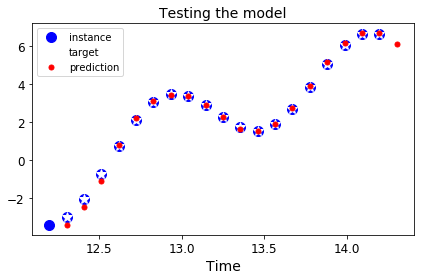

In [25]:
plt.title("Testing the model", fontsize=14)
plt.plot(t_instance[:-1], time_series(t_instance[:-1]), "bo", markersize=10, label="instance")
plt.plot(t_instance[1:], time_series(t_instance[1:]), "w*", markersize=10, label="target")
plt.plot(t_instance[1:], y_pred[0,:,0], "r.", markersize=10, label="prediction")
plt.legend(loc="upper left")
plt.xlabel("Time")

save_fig("time_series_pred_plot")
plt.show()

In [26]:
reset_graph()

n_steps = 20
n_inputs = 1
n_neurons = 100

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_steps, n_outputs])

In [27]:
cell = tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.relu)
rnn_outputs, states = tf.nn.dynamic_rnn(cell, X, dtype=tf.float32)

In [28]:
n_outputs = 1
learning_rate = 0.001

In [29]:
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.layers.dense(stacked_rnn_outputs, n_outputs)
outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])

In [30]:
loss = tf.reduce_mean(tf.square(outputs - y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver()

In [31]:
n_iterations = 1500
batch_size = 50

with tf.Session() as sess:
    init.run()
    for iteration in range(n_iterations):
        X_batch, y_batch = next_batch(batch_size, n_steps)
        sess.run(training_op, feed_dict={X: X_batch, y: y_batch})
        if iteration % 100 == 0:
            mse = loss.eval(feed_dict={X: X_batch, y: y_batch})
            print(iteration, "\tMSE:", mse)
    
    X_new = time_series(np.array(t_instance[:-1].reshape(-1, n_steps, n_inputs)))
    y_pred = sess.run(outputs, feed_dict={X: X_new})
    
    saver.save(sess, "./my_time_series_model")

0 	MSE: 13.907029
100 	MSE: 0.5056698
200 	MSE: 0.19735886
300 	MSE: 0.101214476
400 	MSE: 0.06850145
500 	MSE: 0.06291986
600 	MSE: 0.055129297
700 	MSE: 0.049436502
800 	MSE: 0.050434686
900 	MSE: 0.0482007
1000 	MSE: 0.04809868
1100 	MSE: 0.04982501
1200 	MSE: 0.041912545
1300 	MSE: 0.049292978
1400 	MSE: 0.043140374


In [32]:
y_pred

array([[[-3.4332483],
        [-2.4594698],
        [-1.1081185],
        [ 0.6882153],
        [ 2.1105688],
        [ 3.0585155],
        [ 3.5144088],
        [ 3.3531117],
        [ 2.808016 ],
        [ 2.1606152],
        [ 1.662645 ],
        [ 1.5578941],
        [ 1.9173537],
        [ 2.7210245],
        [ 3.8667865],
        [ 5.100083 ],
        [ 6.099999 ],
        [ 6.6480975],
        [ 6.6147423],
        [ 6.022089 ]]], dtype=float32)

## RNN(Deep RNN)

In [6]:
reset_graph()
n_inputs = 2
n_steps = 5

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])

In [7]:
n_neurons = 100
n_layers = 3

layers = [tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons) for layer in range(n_layers)]
multi_layer_cell = tf.nn.rnn_cell.MultiRNNCell(layers)
outputs, states = tf.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)

In [8]:
init = tf.global_variables_initializer()

In [9]:
X_batch = np.random.rand(2, n_steps, n_inputs)

In [10]:
with tf.Session() as sess:
    init.run()
    outputs_val, states_val = sess.run([outputs, states], feed_dict={X:X_batch})

In [11]:
outputs_val.shape

(2, 5, 100)

## RNN(LSTM)

In [6]:
# reset_graph()
# lstm_cell = tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons)

In [7]:
reset_graph()
n_steps = 28
n_inputs = 28
n_neurons = 150
n_outputs = 10
n_layers = 3

learning_rate = 0.001

X = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.int32, [None])

lstm_cells = [tf.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons) for layer in range(n_layers)]
multi_cell = tf.nn.rnn_cell.MultiRNNCell(lstm_cells)
outputs, states = tf.nn.dynamic_rnn(multi_cell, X, dtype=tf.float32)
top_layer_h_state = states[-1][1]
logits = tf.layers.dense(top_layer_h_state, n_outputs, name="softmax")
xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
loss = tf.reduce_mean(xentropy, name="loss")
optimizer= tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)
correct = tf.nn.in_top_k(logits, y, 1)
accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()

In [8]:
states

(LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_5:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_6:0' shape=(?, 150) dtype=float32>),
 LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_7:0' shape=(?, 150) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>))

In [9]:
top_layer_h_state

<tf.Tensor 'rnn/while/Exit_8:0' shape=(?, 150) dtype=float32>

In [12]:
n_epochs = 10
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        for X_batch, y_batch in shuffle_batch(X_train, y_train, batch_size):
            X_batch = X_batch.reshape(-1, n_steps, n_inputs)
            sess.run(training_op, feed_dict={X:X_batch, y:y_batch})
        X_test = X_test.reshape(-1, n_steps, n_inputs)
        acc_batch = accuracy.eval(feed_dict={X:X_batch, y:y_batch})
        acc_test = accuracy.eval(feed_dict={X:X_test, y:y_test})
        print(epoch, "Last batch accuracy:", acc_batch, "Test accuracy:", acc_test)        

0 Last batch accuracy: 0.93333334 Test accuracy: 0.9522
1 Last batch accuracy: 0.9866667 Test accuracy: 0.968
2 Last batch accuracy: 0.99333334 Test accuracy: 0.9701
3 Last batch accuracy: 0.99333334 Test accuracy: 0.9839
4 Last batch accuracy: 0.9866667 Test accuracy: 0.9806
5 Last batch accuracy: 0.99333334 Test accuracy: 0.9854
6 Last batch accuracy: 0.99333334 Test accuracy: 0.9863
7 Last batch accuracy: 0.9866667 Test accuracy: 0.9862
8 Last batch accuracy: 1.0 Test accuracy: 0.9855
9 Last batch accuracy: 1.0 Test accuracy: 0.987


## RNN(Embeddings)

In [4]:
from six.moves import urllib
import errno
import os
import zipfile

WORDS_PATH = "datasets/words"
WORDS_URL = 'http://mattmahoney.net/dc/text8.zip'

def mkdir_p(path):
    try:
        os.makedirs(path)
    except OSError as exc:
        if exc.errno == errno.EEXIST and os.path.isdir(path):
            pass
        else:
            raise

def fetch_words_data(words_url=WORDS_URL, words_path=WORDS_PATH):
    os.makedirs(words_path, exist_ok=True)
    zip_path = os.path.join(words_path, "words.zip")
    if not os.path.exists(zip_path):
        urllib.request.urlretrieve(words_url, zip_path)
    with zipfile.ZipFile(zip_path) as f:
        data = f.read(f.namelist()[0])
    return data.decode("ascii").split()

In [5]:
words = fetch_words_data()

In [7]:
words[:5]

['anarchism', 'originated', 'as', 'a', 'term']

In [16]:
from collections import Counter

vocabulary_size = 50000

vocabulary = [("UNK",None)] + Counter(words).most_common(vocabulary_size -1)
vocabulary = np.array([word for word, _ in vocabulary])
dictionary = {word: code for code, word in enumerate(vocabulary)}
data = np.array([dictionary.get(word, 0) for word in words])

In [22]:
" ".join(words[:9]), data[:9]

('anarchism originated as a term of abuse first used',
 array([5234, 3081,   12,    6,  195,    2, 3134,   46,   59]))

In [23]:
" ".join([vocabulary[word_index] for word_index in [5234, 3081,   12,    6,  195,    2, 3134,   46,   59]])

'anarchism originated as a term of abuse first used'

In [24]:
words[24], data[24]

('culottes', 0)